In [2]:
# 1. Shannon Entropy

import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms



In [3]:
#(a)Generate scatter plot

#1(a)

filename = 'C:/Users/fatth/OneDrive/Masaüstü/My Documents/Classes/4.sem/ML/utils_exercise02/data_entropy_binary.csv'
df = pd.read_csv(filename)
df

,Unnamed: 0,x_1,x_2,x_label,y_1,y_2,y_label
0,0,-0.204613,0.680304,0,-0.705065,2.161527,1
1,1,-1.151684,-1.312481,0,-0.180569,-0.945071,1
2,2,1.663691,1.135278,0,-0.751258,-1.684396,0
3,3,-0.612010,-0.380869,0,-1.365583,0.170444,1
4,4,1.052268,0.276804,0,0.280257,1.111095,1
5,5,-0.701193,0.509476,0,1.582535,-1.152270,1
6,6,-1.733498,-2.681169,0,0.489060,0.505396,1
7,7,1.730314,-0.821242,0,-0.086335,-1.139397,0
8,8,-1.459150,1.229234,1,1.477788,-0.756258,1
9,9,0.006277,0.271270,0,-0.430042,2.129269,1


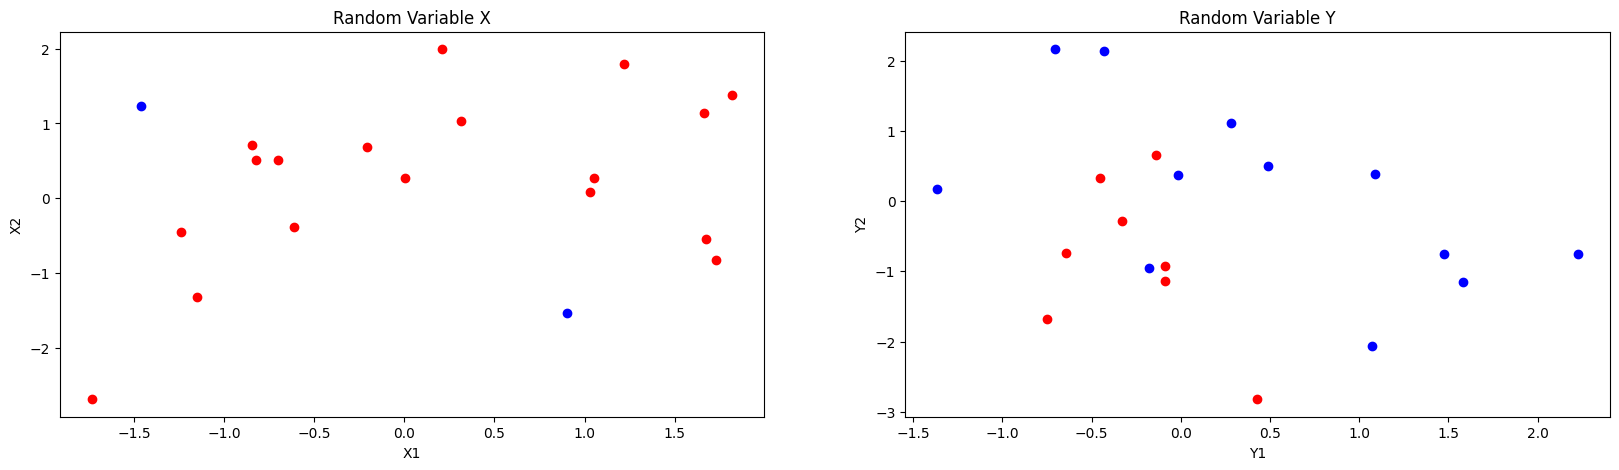

In [4]:
x_1, x_2 = df['x_1'], df['x_2'] #describe cordinates x_1, x_2
y_1, y_2 = df['y_1'], df['y_2'] #describe cordinates y_1, y_2

label_x_0, label_x_1 = df[df['x_label'] == 0], df[df['x_label'] == 1] #describe cordinates label_x_1, label_x_2 where x_label 0 or 1
label_y_0, label_y_1 = df[df['y_label'] == 0], df[df['y_label'] == 1] #describe cordinates label_y_1, label_y_2 where y_label 0 or 1
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
#plot data
axs[0].scatter(label_x_0['x_1'], label_x_0['x_2'], color='red', label='0')
axs[0].scatter(label_x_1['x_1'], label_x_1['x_2'], color='blue', label='1')
axs[1].scatter(label_y_0['y_1'], label_y_0['y_2'], color='red', label='0')
axs[1].scatter(label_y_1['y_1'], label_y_1['y_2'], color='blue', label='1')
axs[0].set_title('Random Variable X')
axs[0].set_xlabel("X1")
axs[0].set_ylabel("X2")
axs[1].set_title('Random Variable Y')
axs[1].set_xlabel("Y1")
axs[1].set_ylabel("Y2")
plt.show()

In [5]:
#(b) compute_probabilities

def compute_probabilities(df, labels):
  return (df[labels].value_counts()/len(df[labels])).to_dict() #convert to dictionary to acces values easily using keys


px = compute_probabilities(df, 'x_label')
py = compute_probabilities(df, 'y_label')
print(f'the probabilities in X random variable are {px}')
print(f'the probabilities in Y random variable are {py}')

the probabilities in X random variable are {0: 0.9, 1: 0.1}
the probabilities in Y random variable are {1: 0.6, 0: 0.4}


In [6]:
#(c) compute_entropy

def compute_entropy(df, labels):
    p = pd.Series(compute_probabilities(df,labels))
    entropy = -sum((p * np.log(p)))
    return entropy
compute_entropy(df, 'x_label')
compute_entropy(df, 'y_label')


0.6730116670092565

In [7]:
#(d) maximum entropy

def maximum_entropy(probability_dict):
    return math.log(len(probability_dict))

compute_entropy_x = compute_entropy(df, 'x_label')
compute_entropy_y= compute_entropy(df, 'y_label')
print(f'Entropy for X is {compute_entropy_x}')
print(f'Entropy for Y is {compute_entropy_y}')
print(f'Maximum Entropy for random variable X is {maximum_entropy(px)}')
print(f'Maximum Entropy for random variable Y is {maximum_entropy(py)}')

Entropy for X is 0.3250829733914482
Entropy for Y is 0.6730116670092565
Maximum Entropy for random variable X is 0.6931471805599453
Maximum Entropy for random variable Y is 0.6931471805599453


In [8]:
#(e) plot 'data_entropy_mutli.csv'

filename = 'C:/Users/fatth/OneDrive/Masaüstü/My Documents/Classes/4.sem/ML/utils_exercise02/data_entropy_mutli.csv'
df1 = pd.read_csv(filename)
df

,Unnamed: 0,x_1,x_2,x_label,y_1,y_2,y_label
0,0,-0.204613,0.680304,0,-0.705065,2.161527,1
1,1,-1.151684,-1.312481,0,-0.180569,-0.945071,1
2,2,1.663691,1.135278,0,-0.751258,-1.684396,0
3,3,-0.612010,-0.380869,0,-1.365583,0.170444,1
4,4,1.052268,0.276804,0,0.280257,1.111095,1
5,5,-0.701193,0.509476,0,1.582535,-1.152270,1
6,6,-1.733498,-2.681169,0,0.489060,0.505396,1
7,7,1.730314,-0.821242,0,-0.086335,-1.139397,0
8,8,-1.459150,1.229234,1,1.477788,-0.756258,1
9,9,0.006277,0.271270,0,-0.430042,2.129269,1


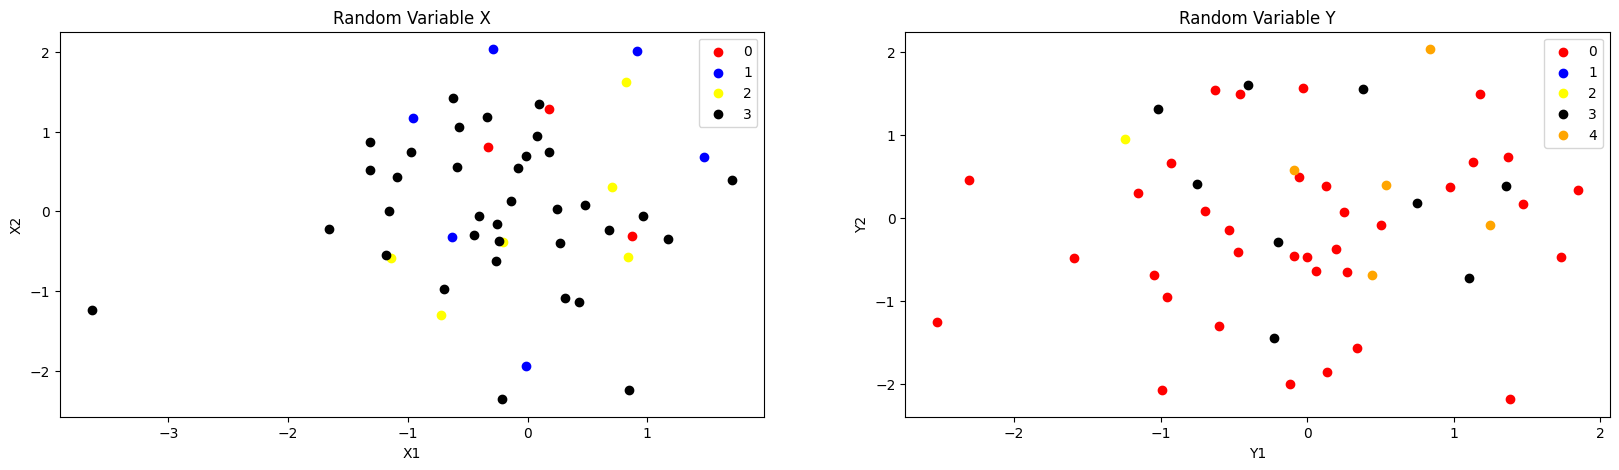

In [9]:
x_1, x_2 = df1['x_1'], df1['x_2']
y_1, y_2 = df1['y_1'],df1['y_2']

label_x0, label_x1 = df1[df1['x_label'] == 0], df1[df1['x_label'] == 1]
label_x2, label_x3 = df1[df1['x_label'] == 2], df1[df1['x_label'] == 3]
label_y0, label_y1 = df1[df1['y_label'] == 0], df1[df1['y_label'] == 1]
label_y2, label_y3 = df1[df1['y_label'] == 2], df1[df1['y_label'] == 3]
label_y4 = df1[df1['y_label'] == 4]
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].scatter(label_x0['x_1'], label_x0['x_2'], color='red', label='0')
axs[0].scatter(label_x1['x_1'], label_x1['x_2'], color='blue', label='1')
axs[0].scatter(label_x2['x_1'], label_x2['x_2'], color='yellow', label='2')
axs[0].scatter(label_x3['x_1'], label_x3['x_2'], color='black', label='3')
axs[1].scatter(label_y0['y_1'], label_y0['y_2'], color='red', label='0')
axs[1].scatter(label_y1['y_1'], label_y1['y_2'], color='blue', label='1')
axs[1].scatter(label_y2['y_1'], label_y2['y_2'], color='yellow', label='2')
axs[1].scatter(label_y3['y_1'], label_y3['y_2'], color='black', label='3')
axs[1].scatter(label_y4['y_1'], label_y4['y_2'], color='orange', label='4')
axs[0].legend()
axs[1].legend()
axs[0].set_title('Random Variable X')
axs[0].set_xlabel("X1")
axs[0].set_ylabel("X2")
axs[1].set_title('Random Variable Y')
axs[1].set_xlabel("Y1")
axs[1].set_ylabel("Y2")
plt.show()


In [10]:
#(f) compute entropy and maximal entropy

compute_entropy_x = compute_entropy(df1, 'x_label')
compute_entropy_y= compute_entropy(df1, 'y_label')
print(f'Entropy for X is {compute_entropy_x}')
print(f'Entropy for Y is {compute_entropy_y}')
print(f'Maximum Entropy for random variable X is {maximum_entropy(px)}')
print(f'Maximum Entropy for random variable Y is {maximum_entropy(py)}')


Entropy for X is 0.9273403524507366
Entropy for Y is 0.8668351472216269
Maximum Entropy for random variable X is 0.6931471805599453
Maximum Entropy for random variable Y is 0.6931471805599453


In [11]:

df_mdist = pd.read_csv('C:/Users/fatth/OneDrive/Masaüstü/My Documents/Classes/4.sem/ML/utils_exercise02/data_mdistance.csv')
df_mdist

,Unnamed: 0,x_1,x_2
0,0,0.841347,3.664968
1,1,1.047163,2.654745
2,2,2.187950,2.284721
3,3,2.310741,3.712085
4,4,2.686888,3.229162
...,...,...,...
245,245,1.726850,1.478160
246,246,1.477072,0.723693
247,247,2.982822,2.508971
248,248,3.145036,1.098630


In [12]:
#2. Exercise: Mahanalobis distanc
#(a) mahanalobis_dist

def mahanalobis_dist(mu, Cx, pt):
    diff = mu - pt # difference between mean and point
    inv_cov_mat = np.linalg.inv(Cx) #inverse covariance matrix
    mahana_dist = np.sqrt(np.dot(np.dot(diff.T, inv_cov_mat), diff))

    return mahana_dist

In [13]:
#(b) mean and covariance

features = df_mdist[['x_1', 'x_2']].values #extracting features into an array
mean = np.mean(features,axis=0) #axis = 0 for mean of each row
cov_mat = np.cov(features, rowvar=False)
print(f'mean is {mean}')
print(f'covariance matrix is {cov_mat}')


mean is [1.03092826 2.92379839]
covariance matrix is [[ 1.91177688 -0.8035866 ]
 [-0.8035866   0.84441323]]


In [14]:
#(c) Pearson Correlation Coefficient

pearson_corr = df_mdist['x_1'].corr(df_mdist['x_2'],method='pearson')
print(f'Pearson correlation coefficient is {pearson_corr}')

Pearson correlation coefficient is -0.6324651038587474


In [15]:
#(d) Mahanalobis distance and Euclids distance for data mdistance points.csv

df_mdist_pt = pd.read_csv('C:/Users/fatth/OneDrive/Masaüstü/My Documents/Classes/4.sem/ML/utils_exercise02/data_mdistance_points.csv')
f = df_mdist_pt[['px', 'py']].values
mahanalobis_distances = []
for point in f:
    m_dist = mahanalobis_dist(mean, cov_mat, point)
    mahanalobis_distances.append(m_dist)

euclidean_distances = np.array(np.linalg.norm(f - mean, axis=1))

print(f'Euclidean distances of are {euclidean_distances}')
print(f'Mahanalobis distances of  are {mahanalobis_distances}')

Euclidean distances of are [0.37020381 2.4121118  2.61108978 0.77935847 0.95097038]
Mahanalobis distances of  are [0.4533706322859069, 2.4070769160026706, 3.0617527034030783, 0.9341553052603836, 1.4260277345116106]


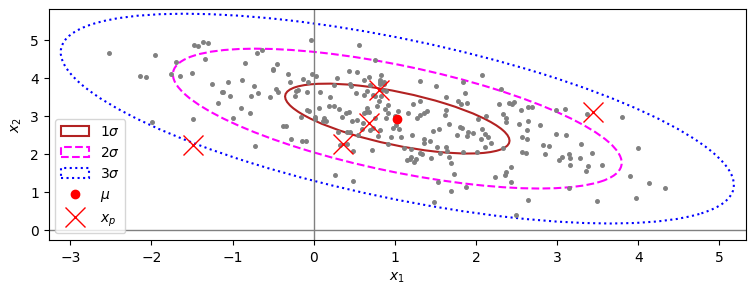

In [16]:
def ax_ellipse(mean, cov, ax, n_std=3.0, facecolor='none', **kwargs):
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = mean[0]

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = mean[1]

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

x1 = df_mdist["x_1"].values
x2 = df_mdist["x_2"].values
X = np.vstack((x1,x2))
mean = np.mean(X,axis=1)
cov = np.cov(X)
df_mdist_points = pd.read_csv('C:/Users/fatth/OneDrive/Masaüstü/My Documents/Classes/4.sem/ML/utils_exercise02/data_mdistance_points.csv')
px = df_mdist_pt["px"]
py = df_mdist_pt["py"]

fig, ax = plt.subplots(1, 1, figsize=(9,3))

ax_ellipse(mean, cov, ax, n_std=1,
                    label=r"$1\sigma$", edgecolor= "firebrick", lw= 1.5)
ax_ellipse(mean, cov, ax, n_std=2,
                    label=r"$2\sigma$", edgecolor= "fuchsia", linestyle= "--" ,lw= 1.5)
ax_ellipse(mean, cov, ax, n_std=3,
                    label=r"$3\sigma$", edgecolor= "blue", linestyle= ":", lw= 1.5)
ax.plot(mean[0], mean[1], "or", linewidth=5.5, label=r"$\mu$")
ax.scatter(x1,x2, s=6.5, c="gray")
ax.plot(px,py, "xr", markersize = 15, label= r"$x_p$")
ax.axvline(c="grey", lw=1)
ax.axhline(c="grey", lw=1)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.legend()

